In [4]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split

In [5]:
dfA = pd.read_csv("wbc.csv")

In [6]:
dfA=dfA.replace('?',np.nan)
dfA['bare_nuclei'] = pd.to_numeric(dfA.bare_nuclei.fillna(dfA.bare_nuclei.median()))
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [7]:
X = dfA.drop([dfA.columns[-1]], axis=1)
y = dfA.jenis.map({2: 0, 4: 1})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [9]:
from sklearn import svm

In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [11]:
from sklearn import metrics

In [12]:
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [13]:
svr=svm.SVC()

In [14]:
gamma_range = [2**i for i in [-15, -13, -11, -9, -7, -5, -3, -1, 1, 3]]

In [15]:
gamma_range

[3.0517578125e-05,
 0.0001220703125,
 0.00048828125,
 0.001953125,
 0.0078125,
 0.03125,
 0.125,
 0.5,
 2,
 8]

In [16]:
C_range = [2**i for i in [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]]

In [17]:
C_range

[0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048, 8192, 32768]

In [18]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},]

scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(svr, tuned_parameters, cv=10,
                       scoring='%s_macro' % score)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_predtr = y_train, clf2.predict(X_train)
    print(classification_report(y_true, y_predtr))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 0.125, 'gamma': 0.0078125, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 0.03125, 'gamma': 3.0517578125e-05, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.03125, 'gamma': 0.0001220703125, 'kernel': 'rbf'}
0.530 (+/-0.067) for {'C': 0.03125, 'gamma': 0.00048828125, 'kernel': 'rbf'}
0.938 (+/-0.102) for {'C': 0.03125, 'gamma': 0.001953125, 'kernel': 'rbf'}
0.959 (+/-0.076) for {'C': 0.03125, 'gamma': 0.0078125, 'kernel': 'rbf'}
0.963 (+/-0.044) for {'C': 0.03125, 'gamma': 0.03125, 'kernel': 'rbf'}
0.949 (+/-0.045) for {'C': 0.03125, 'gamma': 0.125, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.03125, 'gamma': 0.5, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.03125, 'gamma': 2, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.03125, 'gamma': 8, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 0.125, 'gamma': 3.

In [19]:
print("Best recall obtained: {0}".format(clf2.best_score_))
print("Parameters:")
for key, value in clf2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best recall obtained: 0.9667227885088416
Parameters:
	C: 0.125
	gamma: 0.0078125
	kernel: rbf


In [20]:
clf2.best_estimator_

SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc7=svm.SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
svc7.fit(X_train,y_train)

SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred7 = svc7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred7)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred7)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9697
Precision: 0.9487
Recall: 0.9610
F1: 0.9548


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred7)

array([[150,   4],
       [  3,  74]])

In [26]:
y_test.shape

(231,)

In [27]:
y_pred7.shape

(231,)

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc7,X_train,y_train,cv=10)

In [29]:
svc8=svm.SVC(**clf2.best_params_)

In [35]:
scores1=cross_val_score(svc8,X_train,y_train,cv=10)

In [31]:
scores

array([ 0.97916667,  0.97916667,  0.91666667,  0.97916667,  1.        ,
        0.97826087,  0.97826087,  0.95652174,  0.91304348,  0.97826087])

In [36]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9659 (+/- 0.0546)


In [33]:
scores=cross_val_score(svc7,X_train,y_train,cv=10,scoring='recall')

In [34]:
print("recall: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

recall: 0.9699 (+/- 0.1093)


In [33]:
scores=cross_val_score(svc7,X_train,y_train,cv=10,scoring='precision')

In [34]:
print("precision: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

precision: 0.9361 (+/- 0.0773)


In [35]:
scores=cross_val_score(svc7,X_train,y_train,cv=10,scoring='f1')

In [36]:
print("F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

F1: 0.9518 (+/- 0.0784)


In [50]:
classifier=svc7

In [61]:
names='SVM-RBF-Dataset A'

In [52]:
svc8=svm.SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc8.fit(X_train,y_train)

SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
score=svc8.predict_proba(X_test)

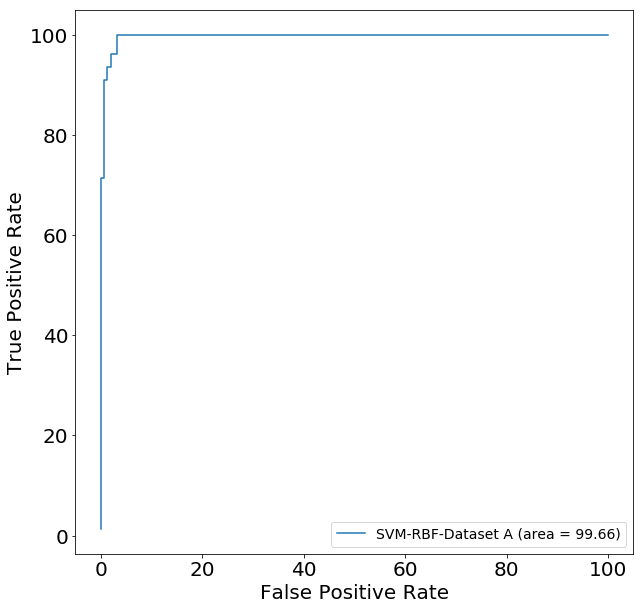

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fpr, tpr, thresholds = roc_curve(y_test, score[:,1])
auc = roc_auc_score(y_test, score[:,1])
plt.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names, auc*100))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(prop={'size':14})
ax.set_xlabel('False Positive Rate',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
plt.show()